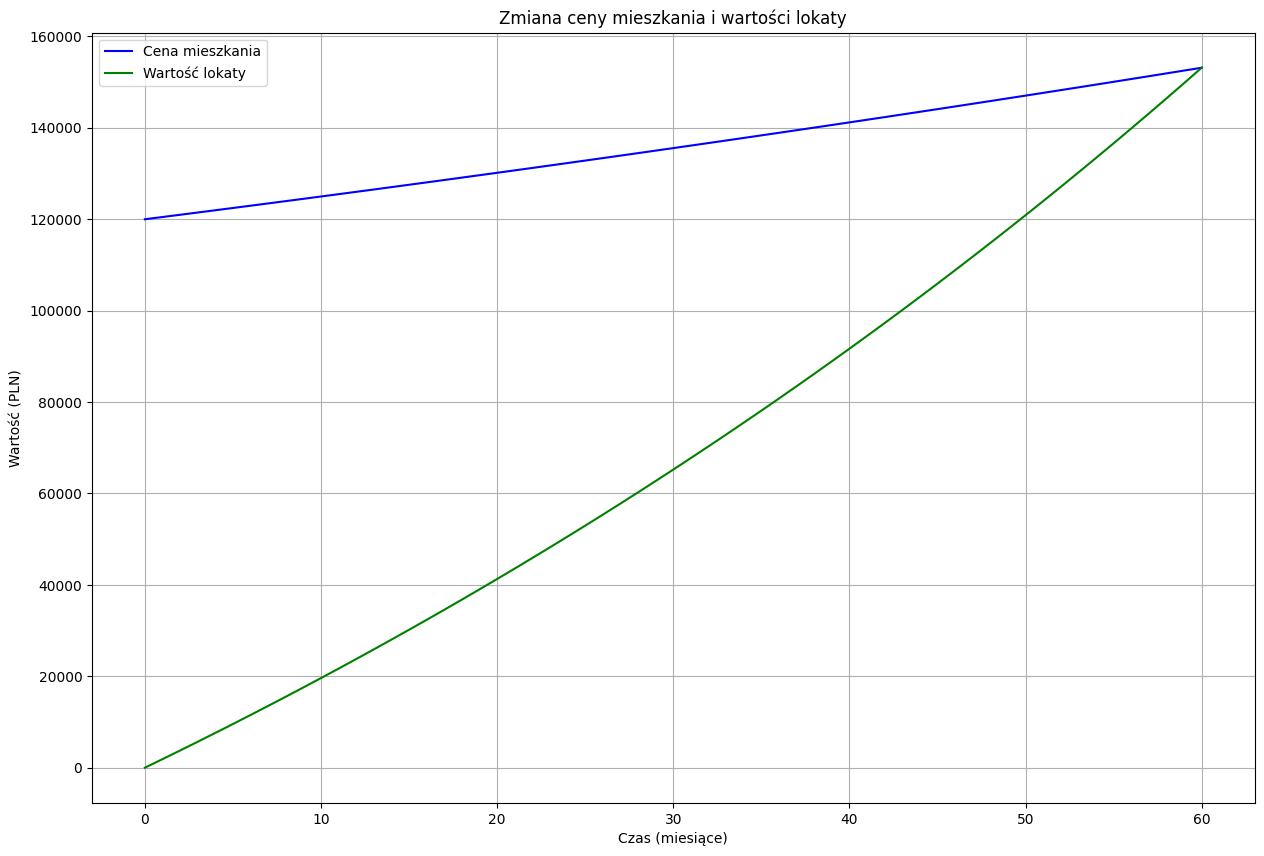

In [16]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

cena_poczatkowa = 120000 
procent_wzrostu_cen = 0.05  
stopa_procentowa = 0.12 / 12
okres_oszczedzania = 5 * 12  
miesieczna_wplata = None  

cena_po_5_latach = cena_poczatkowa * (1 + procent_wzrostu_cen)**5

miesieczna_wplata = npf.pmt(rate=stopa_procentowa, nper=okres_oszczedzania, pv=0, fv=-cena_po_5_latach)
miesieczna_wplata = abs(miesieczna_wplata)

czas = np.arange(okres_oszczedzania + 1)
cena_mieszkania = cena_poczatkowa * (1 + procent_wzrostu_cen)**(czas / 12)
wartosc_lokaty = np.zeros_like(czas)

oszczednosci = 0
for miesiac in range(1, okres_oszczedzania + 1):
    oszczednosci *= (1 + stopa_procentowa)
    oszczednosci += miesieczna_wplata
    wartosc_lokaty[miesiac] = oszczednosci

plt.figure(figsize=(15, 10))
plt.plot(czas, cena_mieszkania, label='Cena mieszkania', color='blue')
plt.plot(czas, wartosc_lokaty, label='Wartość lokaty', color='green')
plt.title('Zmiana ceny mieszkania i wartości lokaty')
plt.xlabel('Czas (miesiące)')
plt.ylabel('Wartość (PLN)')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
print("Przewidywana cena mieszkania za 5 lat:", cena_5)

Przewidywana cena mieszkania za 5 lat: 153153.78750000003


In [3]:
print("Miesięczna wpłata do banku:", miesieczna_wplata)

Miesięczna wpłata do banku: 1875.283538788312
